## Ideology for the heatmap and its data being that, by just the Gap Up/Down information we can refer to these scenearios and set statistical limits for a varity of difference cases.
### I tried multiple different types of graphs, (area, waterfall, etc). Heat map was better representing the type of classification i had in mind

In [3123]:
#Vectorized back testing of VOL strat
#importing libraries to download, manipulate, and store data.
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
import datetime as dt
%matplotlib inline



<AxesSubplot:>

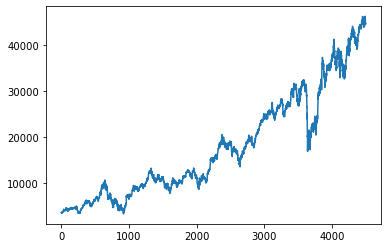

In [3128]:
#Creating copy of DataFrame
hdc = pd.read_csv(r'D:\Downloads\bnf_daily_clean.csv')
hdc['c'].plot()

In [3129]:
hdc

,instrument,date,o,h,l,c,v
0,NIFTY BANK,09-06-2005,3659.80,3664.45,3609.75,3636.50,0
1,NIFTY BANK,10-06-2005,3640.05,3665.80,3585.80,3593.55,0
2,NIFTY BANK,13-06-2005,3593.90,3648.40,3556.70,3642.90,0
3,NIFTY BANK,14-06-2005,3649.05,3696.35,3637.70,3689.80,0
4,NIFTY BANK,15-06-2005,3700.80,3703.75,3662.85,3683.85,0
...,...,...,...,...,...,...,...
4495,NIFTY BANK,21-09-2023,45179.60,45276.80,44592.45,44623.85,0
4496,NIFTY BANK,22-09-2023,44707.35,44996.75,44548.90,44612.05,0
4497,NIFTY BANK,25-09-2023,44615.00,44936.55,44400.90,44766.10,0
4498,NIFTY BANK,26-09-2023,44722.50,44773.80,44532.45,44624.20,0


In [3130]:
hdc.drop(columns ='v',inplace = True)

In [3133]:
hdc

,instrument,date,o,h,l,c
0,NIFTY BANK,09-06-2005,3659.80,3664.45,3609.75,3636.50
1,NIFTY BANK,10-06-2005,3640.05,3665.80,3585.80,3593.55
2,NIFTY BANK,13-06-2005,3593.90,3648.40,3556.70,3642.90
3,NIFTY BANK,14-06-2005,3649.05,3696.35,3637.70,3689.80
4,NIFTY BANK,15-06-2005,3700.80,3703.75,3662.85,3683.85
...,...,...,...,...,...,...
4495,NIFTY BANK,21-09-2023,45179.60,45276.80,44592.45,44623.85
4496,NIFTY BANK,22-09-2023,44707.35,44996.75,44548.90,44612.05
4497,NIFTY BANK,25-09-2023,44615.00,44936.55,44400.90,44766.10
4498,NIFTY BANK,26-09-2023,44722.50,44773.80,44532.45,44624.20


In [3134]:
#Renaming columns
hdc.rename(columns = {'o':'Open','h':'High','l':'Low','c':'Close'}, inplace = True)

<AxesSubplot:>

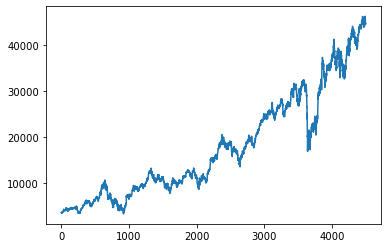

In [3135]:
hdc['Close'].plot()

In [3136]:
#dropping insturment column
hdc.drop(columns = 'instrument', inplace = True)

In [3137]:
#Check for null
hdc.isna().sum()

date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [3138]:
hdc.tail()

,date,Open,High,Low,Close
4495,21-09-2023,45179.60,45276.80,44592.45,44623.85
4496,22-09-2023,44707.35,44996.75,44548.90,44612.05
4497,25-09-2023,44615.00,44936.55,44400.90,44766.10
4498,26-09-2023,44722.50,44773.80,44532.45,44624.20
4499,27-09-2023,44465.90,44668.00,44182.50,44588.30


In [3139]:
# Convert the 'date' column to datetime format
hdc['date'] = pd.to_datetime(hdc['date'], format = '%d-%m-%Y')  

<AxesSubplot:>

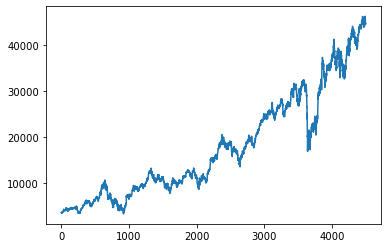

In [3141]:
hdc['Close'].plot()

In [3142]:
# Set 'date' as the datetime index
hdc.set_index('date', inplace=True)


In [3143]:
#Defining dictionary for resampling
ohlc_dict = {
    'Open':'first',
    'High':'max',
    'Low':'min',
    'Close':'last'
    }



In [3144]:

# Resample to weekly data ending on Fridays using the ohlc_dict
hd1 = hdc.resample('W').apply(ohlc_dict)

In [3145]:
hd1

,Open,High,Low,Close
date,,,,
2005-06-12,3659.80,3665.80,3585.80,3593.55
2005-06-19,3593.90,3703.75,3556.70,3595.80
2005-06-26,3600.90,3627.85,3518.95,3599.10
2005-07-03,3599.00,3704.35,3542.40,3678.90
2005-07-10,3684.05,3796.90,3646.95,3772.20
...,...,...,...,...
2023-09-03,44253.65,44779.65,43830.75,44436.10
2023-09-10,44647.65,45383.35,44207.25,45156.40
2023-09-17,45340.80,46310.40,45231.30,46231.50


In [3146]:
hd1.isnull().sum()

Open     2
High     2
Low      2
Close    2
dtype: int64

In [3147]:
#Locating rows with Null values
hd1.loc[hd1.isna().any(axis = 1)]

,Open,High,Low,Close
date,,,,
2009-02-22,NaN,NaN,NaN,NaN
2009-12-13,NaN,NaN,NaN,NaN


In [3148]:
#dropping Null values
hd1.dropna(inplace = True)

In [3149]:
#Locating rows with Null values
hd1.loc[hd1.isna().any(axis = 1)]

,Open,High,Low,Close
date,,,,


In [3150]:
# Creating "gap" column- 
    # 1 signifies Gap up, current periods Open is HIGHER than previous periods Close
    # -1 signifies Gap down, current periods Open is LOWER than previous periods Close
hd1['gap'] = np.where((hd1['Open']/hd1['Close'].shift()>1),1,np.where((hd1['Open']/hd1['Close'].shift()<1),-1,0))


In [3151]:
hd1['gap'].value_counts()

 1    601
-1    341
 0     12
Name: gap, dtype: int64

In [3152]:
#Defining new row for Close shift values, for manual check 
hd1['lc'] = hd1['Close'].shift() 

In [3153]:
hd1.loc[hd1['gap']==0]

,Open,High,Low,Close,gap,lc
date,,,,,,
2005-06-12,3659.80,3665.80,3585.80,3593.55,0,NaN
2006-04-09,4661.50,4905.05,4661.50,4717.60,0,4661.50
2006-09-17,4658.45,4915.20,4480.20,4908.10,0,4658.45
2009-07-12,7566.05,7711.40,6469.00,6520.60,0,7566.05
2015-02-08,19843.75,19991.40,18740.35,18786.70,0,19843.75
2015-02-15,18786.70,19441.00,18226.90,19369.70,0,18786.70
2015-02-22,19369.70,19532.70,18876.25,19073.55,0,19369.70
2015-03-01,19073.55,19776.90,18489.60,19691.20,0,19073.55
2015-03-08,19691.20,20541.65,19398.75,19748.00,0,19691.20


In [3154]:
#checking for count of outliers, in case of same price.
hd1['x1'] = np.where(hd1['Open'] == hd1['lc'],1,0)
hd1['x1'].value_counts()

0    943
1     11
Name: x1, dtype: int64

In [3155]:
#dropping 'x1' column
hd1.drop(columns = 'x1', axis = 1, inplace = True)


In [3156]:
#Printing gap types 
check2 = hd1['gap'].value_counts()
print('No of Gap Ups   ',check2[1])
print('No of Gap Downs ',check2[-1])
print('No of No Gap    ',check2[0])

No of Gap Ups    601
No of Gap Downs  341
No of No Gap     12


In [3157]:
check2.sum()

954

In [3158]:
#Computing Gap percentage, (current open/previous close)-1
hd1['gap_per'] = ((hd1['Open']/hd1['Close'].shift()-1))

<AxesSubplot:xlabel='date'>

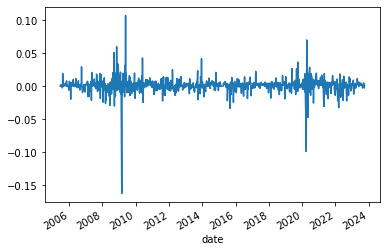

In [3159]:
hd1['gap_per'].plot()


In [3160]:
start2 = '01-01-2017'
end2 = '01-01-2023'


In [3161]:
hd2 = hd1[start2:end2]

In [3162]:
hd2['gap_per'].max()

0.06987240061915556

In [3163]:
hd2['gap_per'].min()

-0.09874689924006774

In [3088]:
hd2['gap_per'].idxmin()

Timestamp('2020-03-29 00:00:00')

In [3089]:
hd2['gap_per'].idxmax()

Timestamp('2020-04-12 00:00:00')

In [3164]:
#Locating rows with 10% and more gap per
asd = hd1['gap_per'] > .1
hd1.loc[asd]

,Open,High,Low,Close,gap,lc,gap_per
date,,,,,,,
2009-05-24,6304.25,7567.9,6304.25,7036.3,1,5695.05,0.10697


In [3165]:
#close to close ret
hd1['weekly_ret'] = np.log(hd1['Close']/hd1['Close'].shift())


#close to close ret
hd1['weekly_ret_offset'] = hd1['weekly_ret'].shift(-1)


#quaterly ret, assuming every quater has 60 trading days
hd1['quat_ret'] = np.log(hd1['Close']/hd1['Close'].shift(60))

In [3166]:
#"dgap_rec" refers to Down Gap Recovery
#Recovery of gap withing same time period as it was created.
                                 #"1" means the entire gap and more was explored by price. Gap was filled in the same period it was created
                                 #"0" gap was not completely filled in the period it was created 
                                                           
hd1['dgap_rec'] = np.where(hd1['gap'] == -1, np.where(hd1['High'] > hd1['Close'].shift(),1,0),np.NaN)

In [3167]:
# Count of 1  represents Down Gap rec is True
# Count of 0  represents Down Gap rec is False
hd1['dgap_rec'].value_counts()

1.0    272
0.0     69
Name: dgap_rec, dtype: int64

In [3173]:
#Pritning to get recoveries
uu = hd1['dgap_rec'].value_counts()

print('Fraction of Down gaps recovered:',uu[1]/uu.sum())
uu

Fraction of Down gaps recovered: 0.7976539589442815


1.0    272
0.0     69
Name: dgap_rec, dtype: int64

79.7% of all Up Downs are recovered within same candle


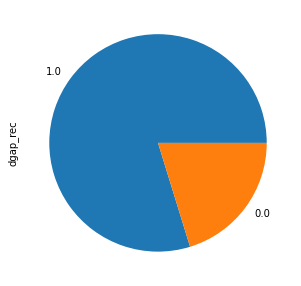

In [3174]:
#plotting pie chart for all the times Down gap was recovered or not
ploty = uu.plot.pie(y=[0], figsize=(5, 5))
print('79.7% of all Up Downs are recovered within same candle')

In [3175]:
#"ugap_rec" refers to Up Gap Recovery
#Recovery of gap withing same time period as it was created.
                                 #"1" means the entire gap and more was explored by price Gap was filled in the same period it was created
                                 #"0" gap was not completely filled in the period it was created 
hd1['ugap_rec'] = np.where(hd1['gap']==1, np.where(hd1['Low'] < hd1['Close'].shift(),1,0),np.NaN)

In [3176]:
# Count of 1  represents Up Gap rec is True
# Count of 0  represents Up Gap rec is False
hd1['ugap_rec'].value_counts()

1.0    468
0.0    133
Name: ugap_rec, dtype: int64

In [3177]:
#Creating new dataframe to make pie charts
o = hd1['ugap_rec'].value_counts()
print('Fraction of Up gaps recovered:',o[1]/o.sum())

Fraction of Up gaps recovered: 0.778702163061564


In [3178]:
#Pritning to get recoveries
o

1.0    468
0.0    133
Name: ugap_rec, dtype: int64

77.8% of all Up gaps are recovered within same candle


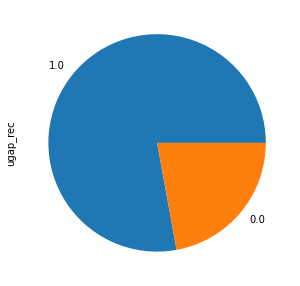

In [3179]:
#plotting pie chart for all the times Up gap was recovered or not
plot = o.plot.pie(y=[0], figsize=(5, 5))
print('77.8% of all Up gaps are recovered within same candle')


In [3180]:
# ugap_excess filters and computes  extent of the recovery after the gaps fill within same time period, when gap == 1
# ugap_excess = (Current Low / Previous Close)
#hd1['ugap_excess'] = np.where(hd1['gap'] == 1, np.where(hd1['Open']-hd1['Low']>hd1['Open']-hd1['Close'].shift(),
                                                      #(np.log(hd1['Low'] / hd1['Close'].shift())*-1),np.NaN),np.NaN
    #np.where((hd1['gap'] == 1) &  
hd1['ugap_excess'] = np.where((hd1['ugap_rec']==1),(np.log(hd1['Low'] / hd1['Close'].shift())*-1),np.NaN)
                                                   

<AxesSubplot:>

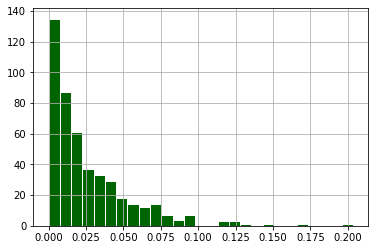

In [3181]:
#Histogram for all ugap excess instances
hd1['ugap_excess'].hist(bins = 'auto',edgecolor = 'white',color = 'darkgreen')

In [3182]:
# dgap_excess filters and and computes extent of the recovery after the gaps fill within same time period, when gap == -1
# ugap_excess = (Current High / Previous Close)
#hd1['dgap_excess'] = np.where(hd1['gap'] == -1 , np.where(hd1['High']>hd1['Close'].shift(),
                                                       #np.log(hd1['High'] / hd1['Close'].shift()),np.NaN),np.NaN)
#np.where((hd1['gap'] == -1) &
hd1['dgap_excess'] =  np.where((hd1['dgap_rec']==1),np.log(hd1['High'] / hd1['Close'].shift()),np.NaN)
                                                       

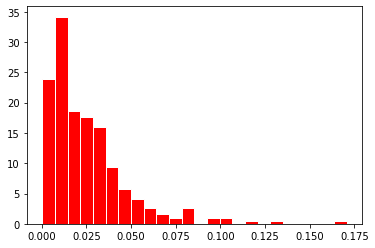

In [3183]:
#Histogram for all ugap excess instances
dataa = hd1['dgap_excess']
hist_values, bin_edges, _ = plt.hist(dataa , bins = 'auto',density = True,edgecolor = 'white',color = 'red')



In [3184]:
hd1

,Open,High,Low,Close,gap,lc,gap_per,weekly_ret,weekly_ret_offset,quat_ret,dgap_rec,ugap_rec,ugap_excess,dgap_excess
date,,,,,,,,,,,,,,
2005-06-12,3659.80,3665.80,3585.80,3593.55,0,NaN,NaN,NaN,0.000626,NaN,NaN,NaN,NaN,NaN
2005-06-19,3593.90,3703.75,3556.70,3595.80,1,3593.55,0.000097,0.000626,0.000917,NaN,NaN,1.0,0.010307,NaN
2005-06-26,3600.90,3627.85,3518.95,3599.10,1,3595.80,0.001418,0.000917,0.021930,NaN,NaN,1.0,0.021604,NaN
2005-07-03,3599.00,3704.35,3542.40,3678.90,-1,3599.10,-0.000028,0.021930,0.025045,NaN,1.0,NaN,NaN,0.028824
2005-07-10,3684.05,3796.90,3646.95,3772.20,1,3678.90,0.001400,0.025045,0.016472,NaN,NaN,1.0,0.008723,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-03,44253.65,44779.65,43830.75,44436.10,1,44231.45,0.000502,0.004616,0.016080,0.235166,NaN,1.0,0.009100,NaN
2023-09-10,44647.65,45383.35,44207.25,45156.40,1,44436.10,0.004761,0.016080,0.023529,0.263892,NaN,1.0,0.005163,NaN
2023-09-17,45340.80,46310.40,45231.30,46231.50,1,45156.40,0.004084,0.023529,-0.035657,0.229824,NaN,0.0,NaN,NaN


In [3185]:
#Calculating weekly returns with offset 
hd1['weekly_ret_shift'] = hd1['weekly_ret'].shift()

In [3186]:
# Computing percentage by which the gap were NOT filled(Current High - Current Opened)  (<) (Previous Close -  Current Open). If LHS > RHS, the gap is NOT filled.
#lack_dgap,rec = log(Previous Close / Current High) 
hd1['lack_dgap_rec'] =  np.where(hd1['gap']==-1, np.where(hd1['High']-hd1['Open'] < hd1['Close'].shift() - hd1['Open'],np.log(hd1['Close'].shift()/hd1['High']),np.NaN),np.NaN)


In [3187]:
# Computing percentage by which the gap were NOT filled(Current open - Current Low)  (<) (Current Open - Previous Close). If LHS > RHS, the gap is NOT filled
#lack_ugap,rec = log(Previous Close / Current Low) 

hd1['lack_ugap_rec'] =  np.where(hd1['gap']==1,  np.where(hd1['Open']-hd1['Low'] < hd1['Open'] - hd1['Close'].shift(),np.log(hd1['Low']/hd1['Close'].shift()),np.NaN),np.NaN)

### Up Lack Recovery analysis

In [3188]:
# Create a new column 'Label' based on the values in the 'gap_per' column
# The 'pd.cut' function is used to create categorical labels based on specified bins
hd1['Label'] = pd.cut(x=hd1['gap_per'],
                     bins=[ 0, 0.005,.01,.05],
                     labels=[ 'Gap_per: 0 to .005','Gap_per: .005 to .01','Gap_per: .01 to .05',])

array([[<AxesSubplot:title={'center':'Gap_per: 0 to .005'}>,
        <AxesSubplot:title={'center':'Gap_per: .005 to .01'}>],
       [<AxesSubplot:title={'center':'Gap_per: .01 to .05'}>,
        <AxesSubplot:>]], dtype=object)

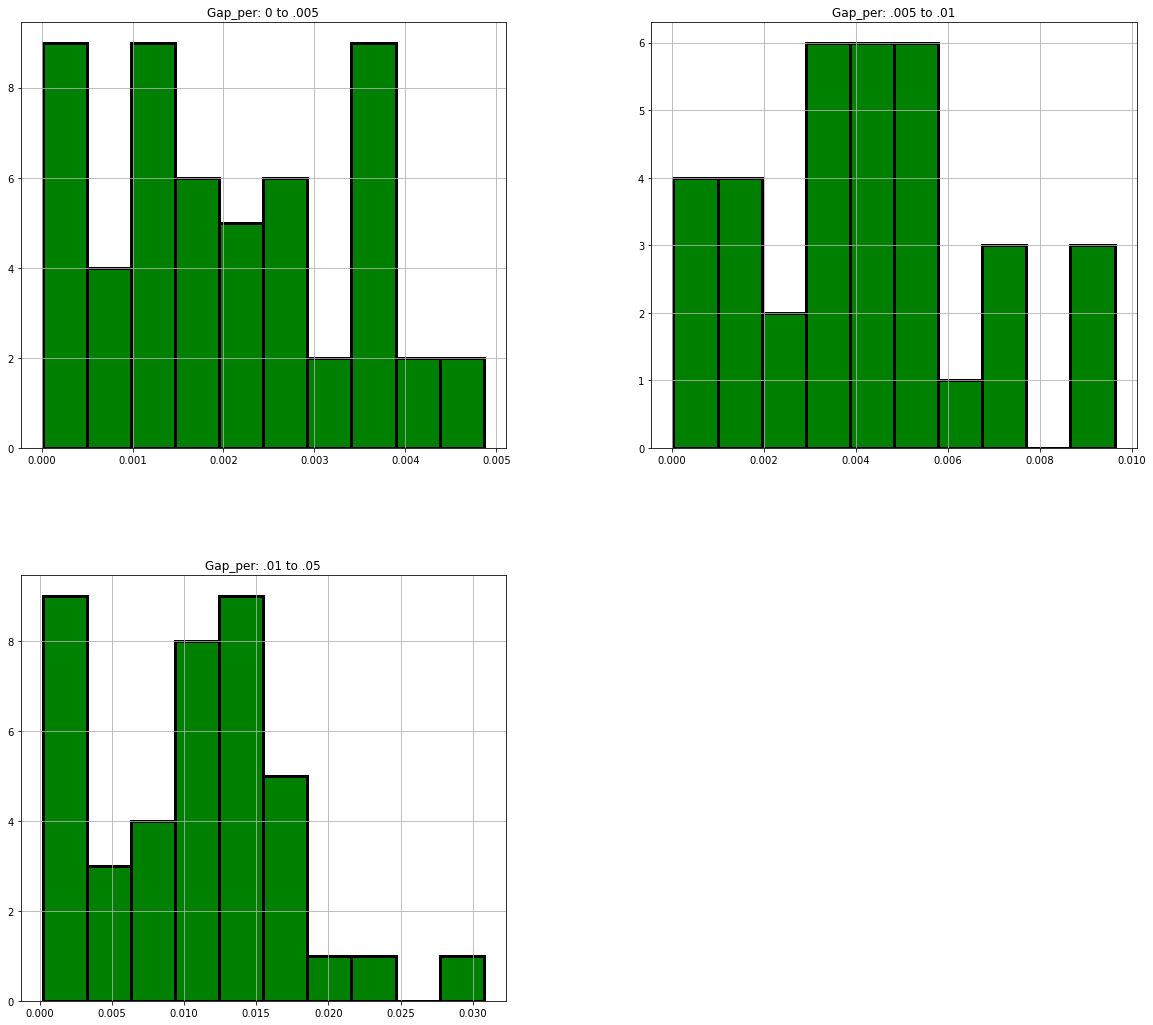

In [3189]:
#Plotting Up gap's with different intervals and their percentage by which the gap were NOT filled()
pivot3 = pd.pivot_table(data=hd1, index=['gap_per'], columns=['Label'], values='lack_ugap_rec')

pivot3.hist(figsize = (20,18), color = ('green'), linewidth=3, edgecolor = 'black' )

### Down Lack Recovery analysis

In [3190]:
#Creating bins and defining labels for gap up opens
hd1['Label2'] = pd.cut(x=hd1['gap_per'],
                     bins=[-.05,-0.01,-0.005, 0],
                     labels=['Gap_per: -0.05 to -.01','Gap_per: -1 to -.005','Gap_per: -0.005 to 0'])

array([[<AxesSubplot:title={'center':'Gap_per: -0.05 to -.01'}>,
        <AxesSubplot:title={'center':'Gap_per: -1 to -.005'}>],
       [<AxesSubplot:title={'center':'Gap_per: -0.005 to 0'}>,
        <AxesSubplot:>]], dtype=object)

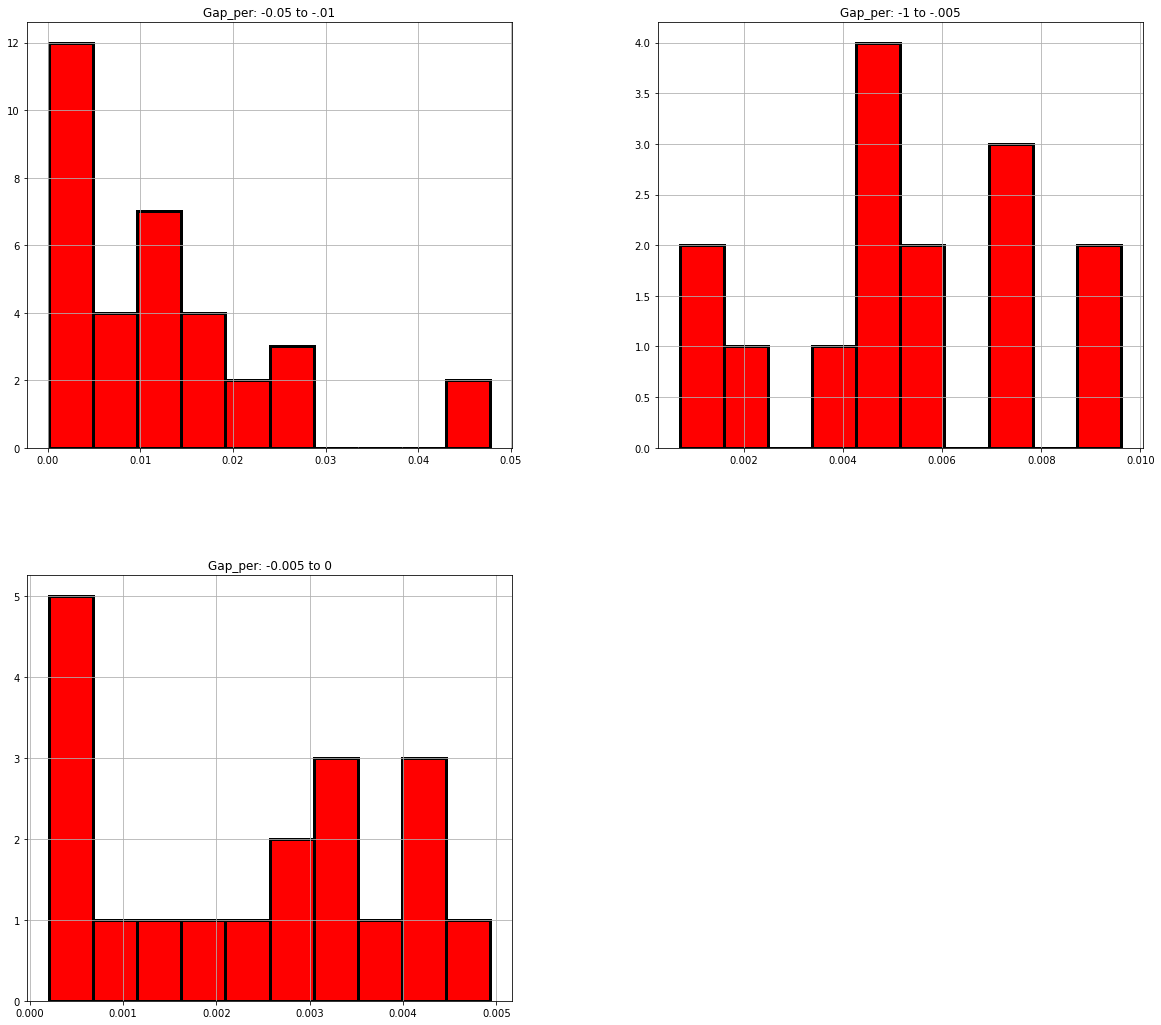

In [3191]:
#Plotting Down gap's with different intervals and their percentage by which the gap were not filled
# Generate a histogram plot of the pivot table
#By using class intervals on gap_percentage, and plotting frequencies of DGAP_EXCESS data
pivot9 = pd.pivot_table(data=hd1, index=['gap_per'], columns=['Label2'], values='lack_dgap_rec')
pivot9.hist(figsize = (20,18), color = ('red'), linewidth=3, edgecolor = 'black')


### Up gap Excess analysis###

array([[<AxesSubplot:title={'center':'Gap_per: 0 to .005'}>,
        <AxesSubplot:title={'center':'Gap_per: .005 to .01'}>],
       [<AxesSubplot:title={'center':'Gap_per: .01 to .05'}>,
        <AxesSubplot:>]], dtype=object)

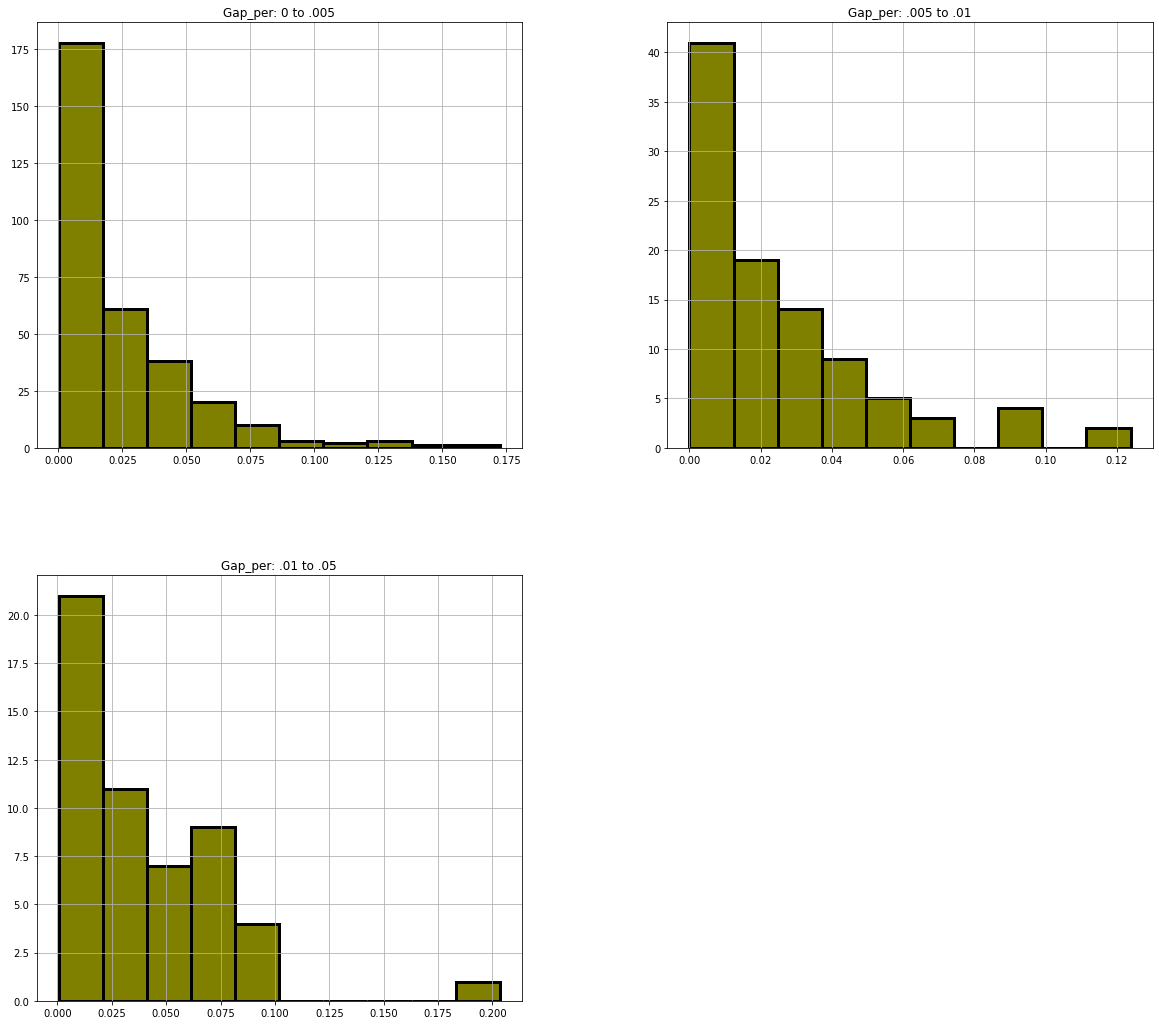

In [3192]:
#Plotting Up gap's with different intervals and their excess returns after gap fill
# Generate a histogram plot of the pivot table
#By using class intervals on gap_percentage, and plotting frequencies of UGAP_EXCESS data

pivot1 = pd.pivot_table(data=hd1, index=['gap_per'], columns=['Label'], values='ugap_excess')

pivot1.hist(figsize = (20,18), color = ('olive'), linewidth=3, edgecolor = 'black')



# Up Gap Excess Detailed probabilities
print('Up Gap Excess Detailed probabilities')
print("aaa = gap_per & bbb = ugap_excess")

In [3193]:
hd1['gap_per'].describe()

count    953.000000
mean       0.001065
std        0.011733
min       -0.162642
25%       -0.002230
50%        0.001312
75%        0.004793
max        0.106970
Name: gap_per, dtype: float64

Up Gap Excess Detailed probabilities
aa = gap_per & bb = ugap_excess


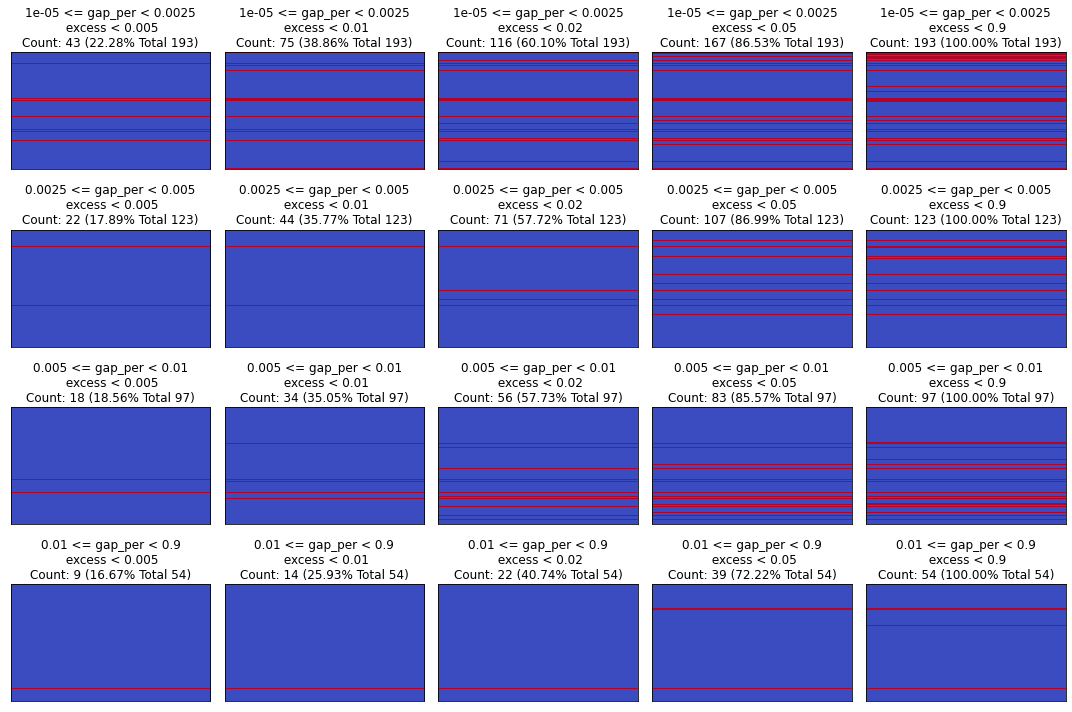

In [3194]:
print('Up Gap Excess Detailed probabilities')
time.sleep(0)
print("aa = gap_per & bb = ugap_excess")

aa = [0.00001, 0.0025, 0.005, 0.01,.9]
bb = [0.005, 0.01, 0.02, 0.05,.9]
# Initialize an empty list to store heatmaps
heatmaps = []

# Initialize a list to store subplot titles
titles = []

# Initialize a dictionary to store the btotal bcount for each 'aa' range
btotal_bcounts = {}

# Nested loops to iterate through each pair of adjacent 'aa' values
for i in range(len(aa) - 1):
    lower_aa = aa[i]
    upper_aa = aa[i + 1]
    
    # Calculate the bcount for the current 'aa' range
    bcount_aa_range = ((hd1['gap_per'] >= lower_aa) & (hd1['gap_per'] < upper_aa)&(hd1['ugap_rec']==1)).sum()
    
    # Store the btotal bcount in the dictionary
    btotal_bcounts[(lower_aa, upper_aa)] = bcount_aa_range
    
    for bb_val in bb:
        # Create a blabel for the current combination
        blabel = (hd1['gap_per'] >= lower_aa) & (hd1['gap_per'] < upper_aa) & (hd1['ugap_excess'] < bb_val )
        
        # Convert the blabel to a bbinary matrix
        bbinary_matrix = blabel.to_numpy().reshape(hd1.shape[0], 1)
        
        # Append the bbinary matrix to the list of heatmaps
        heatmaps.append(bbinary_matrix)
        
        # Generate a subplot title with frequency, bpercentage, and bcount
        bcount = np.sum(blabel)
        btotal = btotal_bcounts[(lower_aa, upper_aa)]
        bpercentage = (bcount / btotal) * 100
        titles.append(f'{lower_aa} <= gap_per < {upper_aa}\n excess < {bb_val}\nCount: {bcount} ({bpercentage:.2f}% Total {btotal})')

# Plot heatmaps for all combinations of 'aa' and 'bb'
fig, axes = plt.subplots(len(aa) - 1, len(bb), figsize=(15, 10))

for i in range(len(aa) - 1):
    for j in range(len(bb)):
        ax = axes[i, j]
        heatmap = heatmaps[i * len(bb) + j]
        ax.imshow(heatmap, cmap='coolwarm', aspect='auto', interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(titles[i * len(bb) + j], fontsize=12)

plt.tight_layout()
plt.show()


Looking at these plots, we get a sense of probabilistis behaviour between Gap_percentage and excess returns.
Now events with high probabilities can help take decisions and make structure around to achieve edge.
On the flip side the events with less probabilities can be used to check the rarity of it and take decisions accordingly.

These different excess densities in or within the range of certain classes really helps in understanding past behaviour and expecting future behaviour to follow these boundries of excess given the gap percent range in market.


## from Up Gap Excess Detailed probabilities

         1)We know that if there is a Up Gap, % of times the price will fill the gap and go further by .005,from the Previous Close(the starting point of the gap)
         2)We know that if there is a Up Gap > 0.01 (more than 0.01%), there is only 16.67% chance the price in that period will stay within .05% recovery, the Gap will be acting like a Ressistance level.
         3)Various conclusion can be drawn by combinations of each excess within one or multiple gap per ranges.
 

Up Gap Excess Detailed probabilities
aa = gap_per & bb = ugap_excess


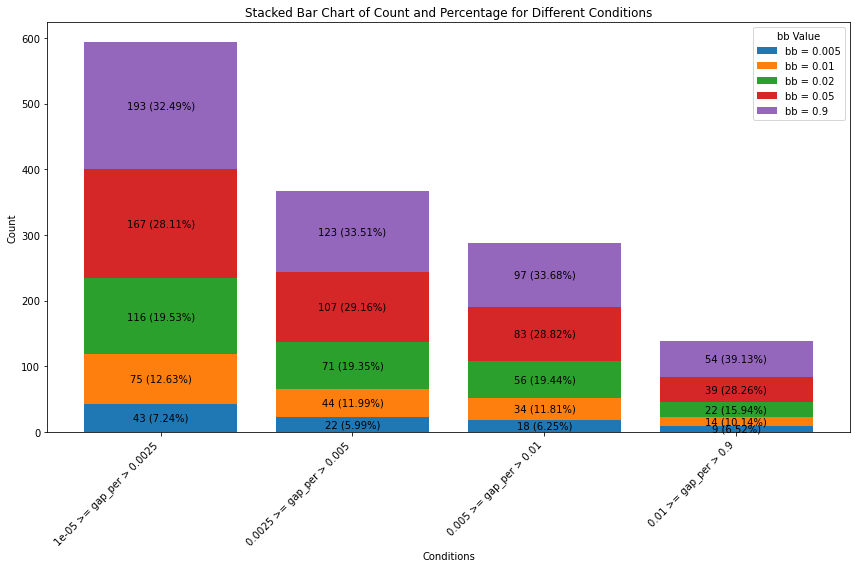

In [3195]:


print('Up Gap Excess Detailed probabilities')
time.sleep(0)
print("aa = gap_per & bb = ugap_excess")

aa = [0.00001, 0.0025, 0.005, 0.01, 0.9]
bb = [0.005, 0.01, 0.02, 0.05, 0.9]

# Initialize lists to store data for the stacked bar chart
categories = [f'{lower_aa} >= gap_per > {upper_aa}' for lower_aa, upper_aa in zip(aa[:-1], aa[1:])]
counts_list = []

# Nested loops to iterate through each pair of adjacent 'aa' values
for i in range(len(aa) - 1):
    lower_aa = aa[i]
    upper_aa = aa[i + 1]

    # Initialize a list to store counts for different 'bb' values in the current 'aa' range
    counts_aa_range = []

    for bb_val in bb:
        # Create a label for the current combination
        label = (hd1['gap_per'] >= lower_aa) & (hd1['gap_per'] < upper_aa) & (hd1['ugap_excess'] < bb_val)

        # Calculate the count for the current combination
        count = np.sum(label)
        
        # Append the count to the list for the current 'aa' range
        counts_aa_range.append(count)
    
    # Append the list of counts for the current 'aa' range to the main list
    counts_list.append(counts_aa_range)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Convert counts_list to a NumPy array for plotting
counts_array = np.array(counts_list)

# Create a bottom for stacking
bottom = np.zeros(len(categories))

for i in range(len(bb)):
    counts = counts_array[:, i]
    ax.bar(categories, counts, label=f'bb = {bb[i]}', bottom=bottom)
    
    # Calculate and add percentage labels on top of each bar
    total_counts = counts_array.sum(axis=1)
    percentages = (counts / total_counts) * 100
    for j, count in enumerate(counts):
        ax.text(categories[j], bottom[j] + count / 2, f'{count} ({percentages[j]:.2f}%)', ha='center', va='center')
    
    bottom += counts

ax.set_xlabel('Conditions')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Count and Percentage for Different Conditions')
ax.legend(title='bb Value', loc='upper right')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


Looking at these plots, we get a sense of probabilistis behaviour between Gap_percentage and excess returns
Now events with high probabilities can help take decisions and make structure around to achieve edge
On the flip side the events with less probabilities can be used to check the rarity of it and take decisions accordingly


## from Up Gap Excess Detailed probabilities

         1)We know that if there is a Up Gap, 41% of times the price will fill the gap and go further by .005,from the Previous Close(the starting point of the gap)
         2)We know that if there is a Up Gap > 0.01% (more than 0.01%), there is only 0.83% chance the price in that period will cross the .05% recovery, acting like a Support level
 

# Down Gap Excess Detailed probabilities


In [3196]:
#Creating bins and defining labels for gap up opens
hd1['Label2'] = pd.cut(x=hd1['gap_per'],
                     bins=[-.05,-0.01,-0.005, 0],
                     labels=['Gap_per: -.05 to -.01','Gap_per: -1 to -.005','Gap_per: -.005 to 0'])

array([[<AxesSubplot:title={'center':'Gap_per: -.05 to -.01'}>,
        <AxesSubplot:title={'center':'Gap_per: -1 to -.005'}>],
       [<AxesSubplot:title={'center':'Gap_per: -.005 to 0'}>,
        <AxesSubplot:>]], dtype=object)

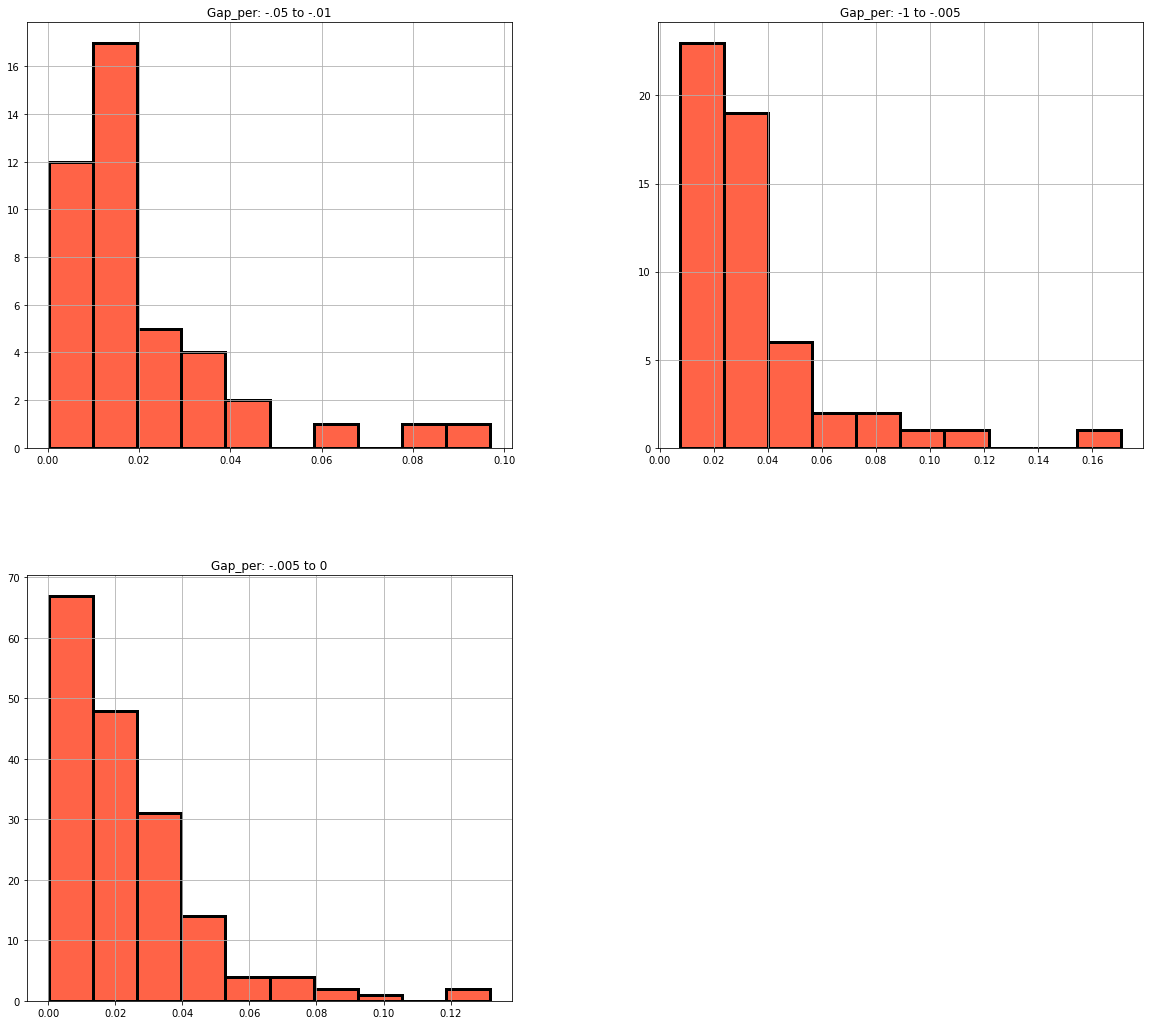

In [3197]:
#Plotting Down gap's with different intervals and their excess returns after gap fill
# Generate a histogram plot of the pivot table
#By using class intervals on gap_percentage, and plotting frequencies of DGAP_EXCESS data
pivot2 = pd.pivot_table(data=hd1, index=['gap_per'], columns=['Label2'], values='dgap_excess')
pivot2.hist(figsize = (20,18), color = ('tomato'), linewidth=3, edgecolor = 'black')


In [3198]:
hd1['dgap_excess'].describe()

count    272.000000
mean       0.025415
std        0.023458
min        0.000218
25%        0.010110
50%        0.019028
75%        0.033194
max        0.170617
Name: dgap_excess, dtype: float64

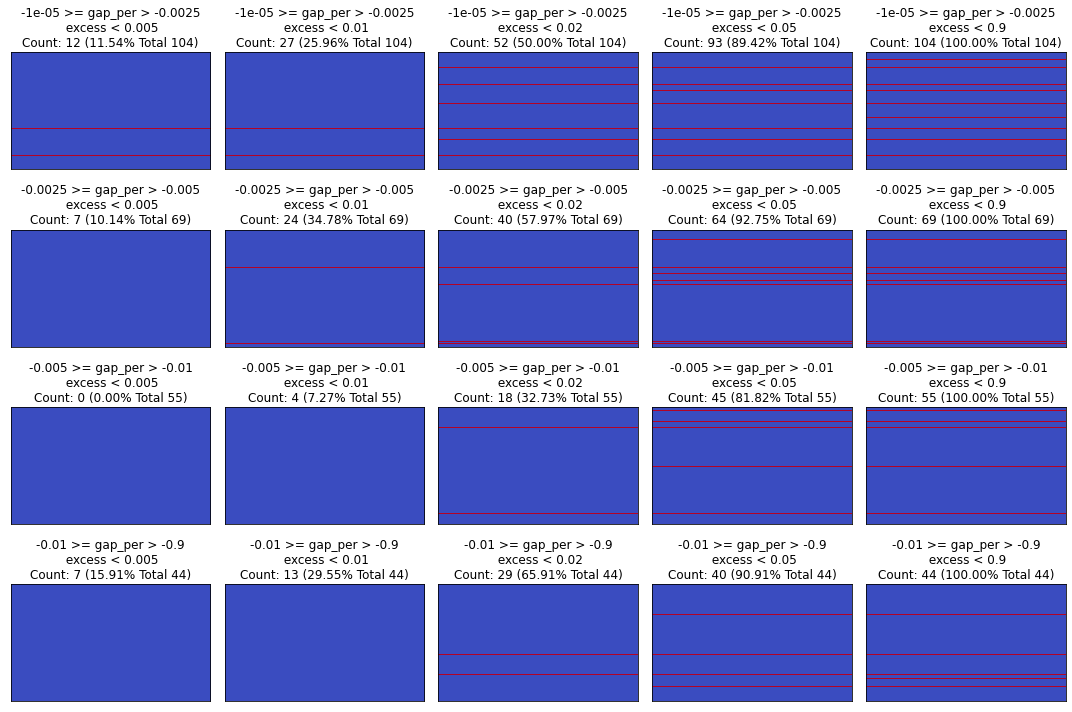

In [3199]:
aaa = [-0.00001, -0.0025, -0.005, -0.01,-.9]
bbb = [0.005, 0.01, 0.02, 0.05,.9]
# Initialize an empty list to store heatmaps
heatmaps = []

# Initialize a list to store subplot titles
titles = []

# Initialize a dictionary to store the total count for each 'aaaa' range
total_counts = {}

# Nested loops to iterate through each pair of adjacent 'aaaa' values
for i in range(len(aaa) - 1):
    lower_aaa = aaa[i]
    upper_aaa = aaa[i + 1]
    
    # Calculate the count for the current 'aaaa' range
    count_aaa_range = ((hd1['gap_per'] <= lower_aaa) & (hd1['gap_per'] > upper_aaa)&(hd1['dgap_rec']==1)).sum()
    
    # Store the total count in the dictionary
    total_counts[(lower_aaa, upper_aaa)] = count_aaa_range
    
    for bbb_val in bbb:
        # Create a label for the current combination
        label = (hd1['gap_per'] <= lower_aaa) & (hd1['gap_per'] > upper_aaa) & (hd1['dgap_excess'] < bbb_val )
        
        # Convert the label to a binary matrix
        binary_matrix = label.to_numpy().reshape(hd1.shape[0], 1)
        
        # Append the binary matrix to the list of heatmaps
        heatmaps.append(binary_matrix)
        
        # Generate a subplot title with frequency, percentage, and count
        count = np.sum(label)
        total = total_counts[(lower_aaa, upper_aaa)]
        percentage = (count / total) * 100
        titles.append(f'{lower_aaa} >= gap_per > {upper_aaa}\n excess < {bbb_val}\nCount: {count} ({percentage:.2f}% Total {total})')

# Plot heatmaps for all combinations of 'aaaa' and 'bbb'
fig, axes = plt.subplots(len(aaa) - 1, len(bbb), figsize=(15, 10))

for i in range(len(aaa) - 1):
    for j in range(len(bbb)):
        ax = axes[i, j]
        heatmap = heatmaps[i * len(bbb) + j]
        ax.imshow(heatmap, cmap='coolwarm', aspect='auto', interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(titles[i * len(bbb) + j], fontsize=12)

plt.tight_layout()
plt.show()



Looking at these plots, we get a sense of probabilistis behaviour between Gap_percentage and excess returns.
Now events with high probabilities can help take decisions and make structure around to achieve edge.
On the flip side the events with less probabilities can be used to check the rarity of it and take decisions accordingly.

These different excess densities in or within the range of certain classes really helps in understanding past behaviour and expecting future behaviour to follow these boundries of excess given the gap percent range in market.


## from Down Gap Excess Detailed probabilities

          1)We know that if there is a Down Gap, % of times the price will fill the gap and go further by .005,from the Previous Close(the starting point of the gap)
          2)We know that if there is a Down Gap < 0 & Down gap > -.0025 (more than -0.0025%), there is only 11.54% chance the price in that period will stay within .05% recovery, the Gap will be acting like a Ressistance level.
         3)Various conclusion can be drawn by combinations of each excess within one or multiple gap per ranges.
 

Down Gap Excess Detailed probabilities
aa = gap_per & bb = ugap_excess


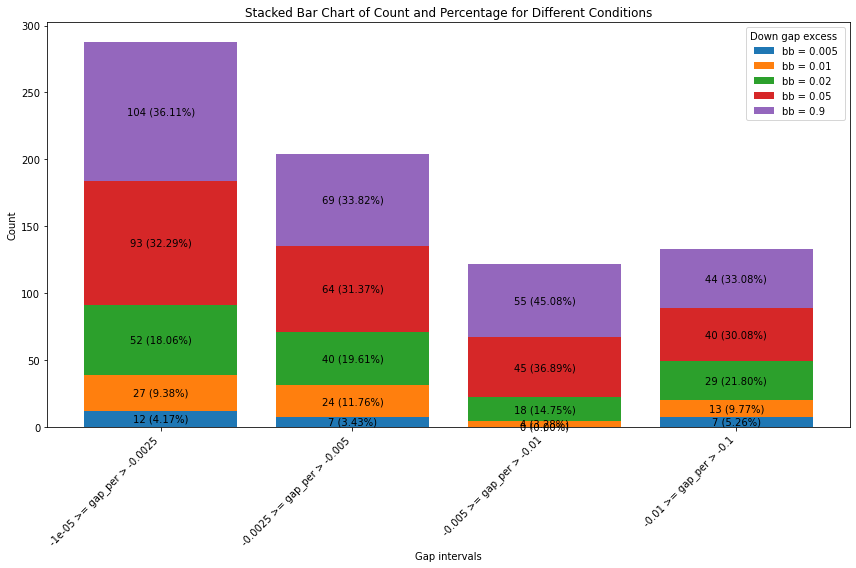

In [3200]:


print('Down Gap Excess Detailed probabilities')
time.sleep(0)
print("aa = gap_per & bb = ugap_excess")

aa = [-0.00001, -0.0025, -0.005, -0.01,-.1]
bb = [0.005, 0.01, 0.02, 0.05, 0.9]

# Initialize lists to store data for the stacked bar chart
categories = [f'{lower_aa} >= gap_per > {upper_aa}' for lower_aa, upper_aa in zip(aa[:-1], aa[1:])]
counts_list = []

# Nested loops to iterate through each pair of adjacent 'aa' values
for i in range(len(aa) - 1):
    lower_aa = aa[i]
    upper_aa = aa[i + 1]

    # Initialize a list to store counts for different 'bb' values in the current 'aa' range
    counts_aa_range = []

    for bb_val in bb:
        # Create a label for the current combination
        label = (hd1['gap_per'] <= lower_aa) & (hd1['gap_per'] > upper_aa) & (hd1['dgap_excess'] < bb_val)

        # Calculate the count for the current combination
        count = np.sum(label)
        
        # Append the count to the list for the current 'aa' range
        counts_aa_range.append(count)
    
    # Append the list of counts for the current 'aa' range to the main list
    counts_list.append(counts_aa_range)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Convert counts_list to a NumPy array for plotting
counts_array = np.array(counts_list)

# Create a bottom for stacking
bottom = np.zeros(len(categories))

for i in range(len(bb)):
    counts = counts_array[:, i]
    ax.bar(categories, counts, label=f'bb = {bb[i]}', bottom=bottom)
    
    # Calculate and add percentage labels on top of each bar
    total_counts = counts_array.sum(axis=1)
    percentages = (counts / total_counts) * 100
    for j, count in enumerate(counts):
        ax.text(categories[j], bottom[j] + count / 2, f'{count} ({percentages[j]:.2f}%)', ha='center', va='center')
    
    bottom += counts

ax.set_xlabel('Gap intervals')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Count and Percentage for Different Conditions')
ax.legend(title='Down gap excess ', loc='upper right')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


# END